# Tarefa Grupo : Previsão de salários de *hitters* (Major League Baseball)
Decisão e Aprendizagem Automática

[Link do Dataset](https://www.kaggle.com/datasets/thedevastator/uncovering-the-most-cost-effective-mlb-hitters-o)

Este dataset tem como objetivo prever o salário de jogadores profissionais de Basebol da MLB, com base nas suas estatísticas, de forma a verificar e estudar a influência das caraterísticas de cada jogador no seu salário, bem como a influência de cada uma delas neste mesmo.

Escolhemos este dataset por sermos todos apreciadores de desporto, bem como a cultura relacionada com eles. Para além disso, é um dataset de regressão, de forma a complementar o dataset de classificação da tarefa de grupo, de forma a melhor aplicar os conhecimentos adquiridos na cadeira.

NOTA: É de importância notar que, apesar de permitir uma previsão relativamente precisa, na realidade os salários são afetados por muitos fatores externos (personalidade, capacidade financeira da equipa, níveis de popularidade/fama, etc...), não facilmente medidos.

Descrição dos atributos do [dataset](https://www.kaggle.com/datasets/thedevastator/uncovering-the-most-cost-effective-mlb-hitters-o):

| Nome da coluna | Descrição |
| -------- | -------- |
| Player Name | Nome do jogador. (String) |
| weight | Peso do jogador em libras (massa). (Inteiro) | 
| height | Altura do jogador em polegadas. (Inteiro) |
| bats | Destro, canhoto ou usa as duas mãos ao rebater. (String) |
| throws | Destro ou canhoto ao lançar. (String) |
| Season | Ano da temporada. (Inteiro) |
| League | Equipa da Liga Americana ou Nacional. (String) |
| Team | Nome da equipa da MLB a que pertence. (String) |
| Franchise | Nome da franquia que é dona da equipa a que pertence. (String) |
| G | Número de jogos jogados pelo jogador durante a temporada. (Inteiro) |
| AB | Número de vezes ao bastão (batter) pelo jogador durante a temporada. (Inteiro) |
| R | Número de corridas marcadas pelo jogador durante a temporada. (Inteiro) |
| 2B | Número de duplas (double) batidas pelo jogador durante a temporada. (Inteiro) |
| 3B | Número de triplas (triple) batidas pelo jogador durante a temporada. (Inteiro) |
| HR | Número de home runs batidos pelo jogador durante a temporada. (Inteiro) |
| RBI | Número de corridas batidas pelo jogador durante a temporada. (Inteiro) |
| SB | Número de bases roubadas pelo jogador durante a temporada. (Inteiro) |
| BB | Número de walks emitidos para o jogador durante a temporada. (Inteiro) |
| SO | Número de strikeouts feitos pelo jogador durante a temporada. (Inteiro) |
| IBB | Número de Base Intencional por Bolas ou Walk Intencional Emitido ao Redor do Árbitro de Home Plate. (Inteiro) |
| HBP | Número de vezes que acertou no Batedor na Vez ao Bastão. (Inteiro) |
| SH | Fly de sacrifício capturado e registado durante o respectivo jogo de bola. (Inteiro) |
| SF | Número total de Flies de Sacrifício feitos até agora. (Inteiro) |
| PA | Número de Participações no Prato durante toda a duração do jogo. (Inteiro)

No desenvolvimento desta tarefa utilizamos a metodologia CRISP-DM. Este método de análise de dados divide o nosso processo em 6 fases: estudo do negócio (compreensão e determinação dos objetivos do projeto), estudo dos dados (recolha e exploração dos dados), preparação dos dados (seleção e limpeza dos dados), modelação (experimentação com técnicas de modelação), avaliação (avaliação dos resultados e possível reavaliação do processo) e desenvolvimento (colocação do modelo em execução), sendo uma metodologia cíclica, não implicando portanto uma execução sequencial das várias fases.

![crispDM](crispdm.png "Metodologia CRISP-DM")

Nesta secção explicar as colunas que existem 
o objetivo do dataset
o porque de escolhermos este dataset
outras caracteristicas que achemos importantes

escolhemos dataset para um problema de regressao porque o outro e` classificacao

COMPLETAR ISTO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Em cada uma das seccoes escrever a conclusao ao final daquela iterecao

Explicar dataset, organizar notebook e explicar metedologia adotada (SEMMA)

### Importação das bibliotecas necessárias

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso




### Ingestão de dados

In [83]:
df = pd.read_csv("./MLB Stats.csv",na_filter=False) # ver aquela cena do none as false 

### Visualização dos dados

In [84]:
df.head()

,index,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,...,0,0,0,0,300000,0,0,0,0,0
1,1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,...,0,0,0,0,387500,0,0,0,0,0
2,2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,...,0,0,0,1,403250,0,0,0,0,1
3,3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,...,0,0,0,0,419000,0,0,0,0,0
4,4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,...,0,0,0,0,500000,0,0,0,0,0


In [85]:
df.tail()

,index,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
28288,28288,zupcibo01,Bob Zupcic,220,76,R,R,1991,AL,BOS,...,3,0,1,6,100000,0,0,1,0,27
28289,28289,zupcibo01,Bob Zupcic,220,76,R,R,1992,AL,BOS,...,43,2,25,60,109000,1,4,7,4,433
28290,28290,zupcibo01,Bob Zupcic,220,76,R,R,1993,AL,BOS,...,26,5,27,54,222000,2,2,8,3,328
28291,28291,zuvelpa01,Paul Zuvella,173,72,R,R,1989,AL,CLE,...,6,0,1,11,145000,0,1,0,0,60
28292,28292,zychto01,Tony Zych,190,75,R,R,2016,AL,SEA,...,0,0,0,0,511000,0,0,0,0,0


In [86]:
df.columns

Index(['index', 'playerID', 'Player Name', 'weight', 'height', 'bats',
       'throws', 'Season', 'League', 'teamID', 'Team', 'Franchise', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'salary', 'IBB',
       'HBP', 'SH', 'SF', 'PA'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        28293 non-null  int64 
 1   playerID     28293 non-null  object
 2   Player Name  28293 non-null  object
 3   weight       28293 non-null  int64 
 4   height       28293 non-null  int64 
 5   bats         28293 non-null  object
 6   throws       28293 non-null  object
 7   Season       28293 non-null  int64 
 8   League       28293 non-null  object
 9   teamID       28293 non-null  object
 10  Team         28293 non-null  object
 11  Franchise    28293 non-null  object
 12  G            28293 non-null  int64 
 13  AB           28293 non-null  int64 
 14  R            28293 non-null  int64 
 15  H            28293 non-null  int64 
 16  2B           28293 non-null  int64 
 17  3B           28293 non-null  int64 
 18  HR           28293 non-null  int64 
 19  RBI          28293 non-nu

In [88]:
df.describe()

,index,weight,height,Season,G,AB,R,H,2B,3B,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
count,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,...,28293.000000,28293.000000,28293.000000,28293.000000,2.829300e+04,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000
mean,14146.000000,199.049305,73.500194,2000.938183,63.933871,161.879900,21.786838,42.624536,8.220655,0.909165,...,20.783763,3.107518,15.801718,30.376241,2.112965e+06,1.326052,1.450642,1.534549,1.366911,183.359771
std,8167.629919,22.653983,2.286595,8.900551,47.285257,199.406647,30.133899,56.200911,11.401446,1.832408,...,29.704822,7.494805,23.036362,37.624155,3.440239e+06,3.160607,2.782354,2.748349,2.207801,226.217383
min,0.000000,140.000000,66.000000,1985.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.090000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7073.000000,185.000000,72.000000,1994.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000e+05,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14146.000000,195.000000,74.000000,2001.000000,50.000000,57.000000,4.000000,10.000000,2.000000,0.000000,...,4.000000,0.000000,3.000000,15.000000,6.000000e+05,0.000000,0.000000,0.000000,0.000000,66.000000
75%,21219.000000,215.000000,75.000000,2009.000000,101.000000,298.000000,37.000000,76.000000,14.000000,1.000000,...,34.000000,2.000000,25.000000,50.000000,2.425000e+06,1.000000,2.000000,2.000000,2.000000,337.000000
max,28292.000000,315.000000,83.000000,2016.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,...,165.000000,110.000000,232.000000,223.000000,3.300000e+07,120.000000,35.000000,39.000000,17.000000,783.000000


In [89]:
df.isnull().sum()

index          0
playerID       0
Player Name    0
weight         0
height         0
bats           0
throws         0
Season         0
League         0
teamID         0
Team           0
Franchise      0
G              0
AB             0
R              0
H              0
2B             0
3B             0
HR             0
RBI            0
SB             0
BB             0
SO             0
salary         0
IBB            0
HBP            0
SH             0
SF             0
PA             0
dtype: int64

In [90]:
df_int = df.select_dtypes(include=['int'])
df_int.corr()

,index,weight,height,Season,G,AB,R,H,2B,3B,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
index,1.000000,0.003273,0.023527,-0.006026,-0.027936,-0.032677,-0.032153,-0.031964,-0.032039,-0.029558,...,-0.031009,-0.023791,-0.025974,-0.029902,0.020471,-0.024083,-0.029704,-0.007019,-0.036565,-0.032593
weight,0.003273,1.000000,0.539801,0.424305,-0.080874,-0.089453,-0.082409,-0.088201,-0.047991,-0.167602,...,-0.004831,-0.188545,-0.053066,0.019234,0.199390,0.015383,-0.000076,-0.171095,-0.053696,-0.086644
height,0.023527,0.539801,1.000000,0.053006,-0.226921,-0.247089,-0.224280,-0.238658,-0.207761,-0.239918,...,-0.146632,-0.244606,-0.183132,-0.148450,0.074569,-0.059576,-0.169205,-0.171330,-0.168878,-0.243096
Season,-0.006026,0.424305,0.053006,1.000000,-0.000024,-0.006963,-0.009216,-0.009511,0.020309,-0.037861,...,-0.005310,-0.054530,-0.024156,0.068342,0.360058,-0.053137,0.078766,-0.069433,-0.029906,-0.009507
G,-0.027936,-0.080874,-0.226921,-0.000024,1.000000,0.925185,0.890184,0.913764,0.877293,0.616526,...,0.863851,0.540927,0.829148,0.838210,0.161444,0.565503,0.615681,0.219020,0.749810,0.925421
AB,-0.032677,-0.089453,-0.247089,-0.006963,0.925185,1.000000,0.964169,0.990083,0.949833,0.667282,...,0.932611,0.594885,0.879662,0.902060,0.208777,0.594423,0.662064,0.254001,0.807163,0.998472
R,-0.032153,-0.082409,-0.224280,-0.009216,0.890184,0.964169,1.000000,0.973927,0.940240,0.676805,...,0.940211,0.635824,0.913207,0.876136,0.227782,0.620724,0.670292,0.198617,0.788262,0.969915
H,-0.031964,-0.088201,-0.238658,-0.009511,0.913764,0.990083,0.973927,1.000000,0.959691,0.673932,...,0.940241,0.603232,0.877870,0.869399,0.215163,0.613838,0.657334,0.222208,0.807441,0.989378
2B,-0.032039,-0.047991,-0.207761,0.020309,0.877293,0.949833,0.940240,0.959691,1.000000,0.608920,...,0.926061,0.527097,0.854106,0.851604,0.218769,0.603397,0.651481,0.169373,0.794655,0.950494
3B,-0.029558,-0.167602,-0.239918,-0.037861,0.616526,0.667282,0.676805,0.673932,0.608920,1.000000,...,0.553260,0.656541,0.550569,0.567397,0.043979,0.327102,0.403740,0.261907,0.486607,0.661730


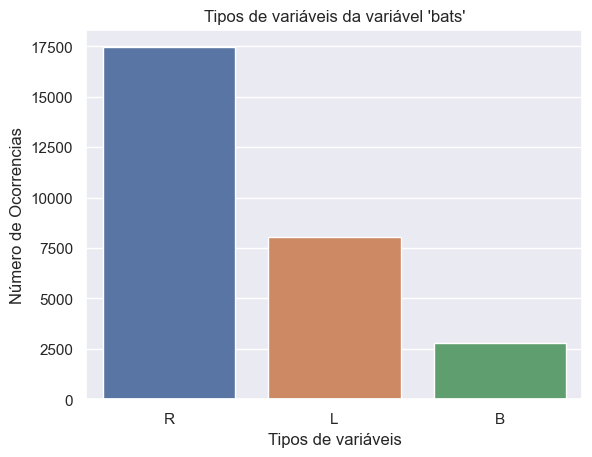

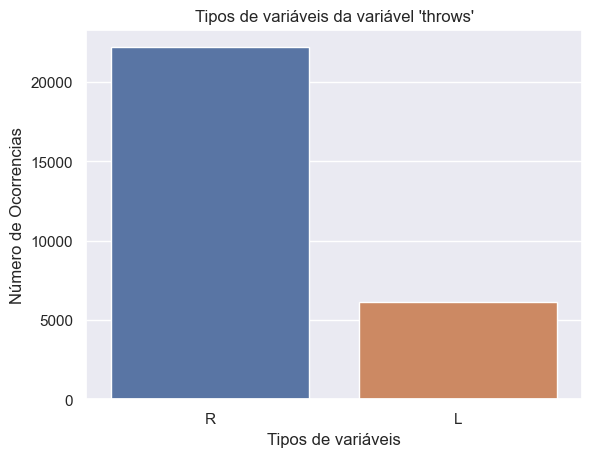

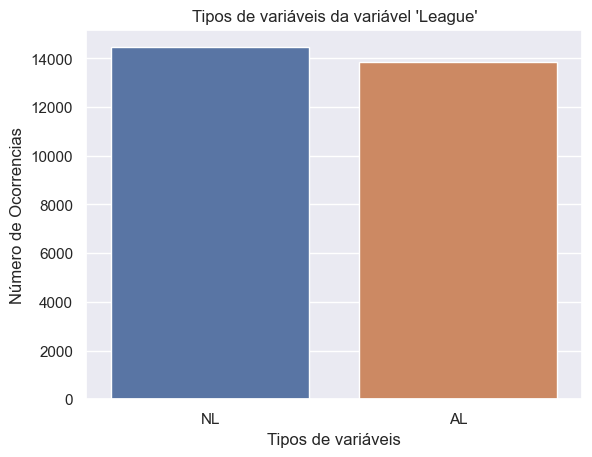

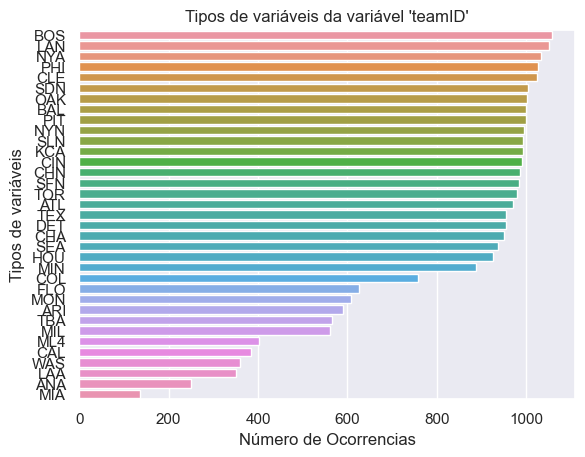

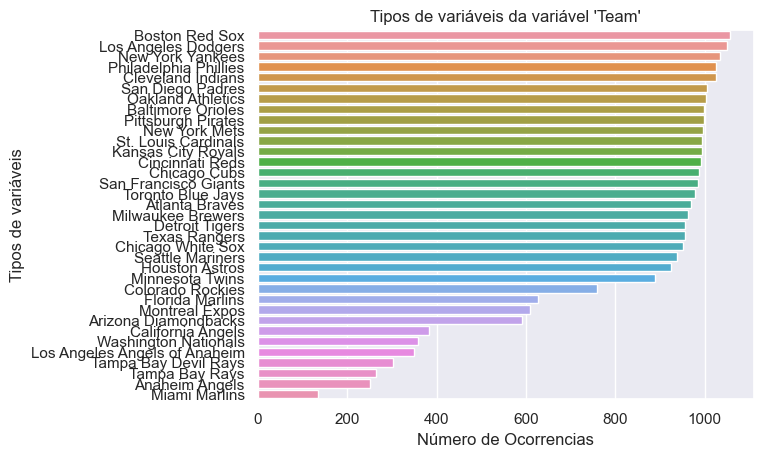

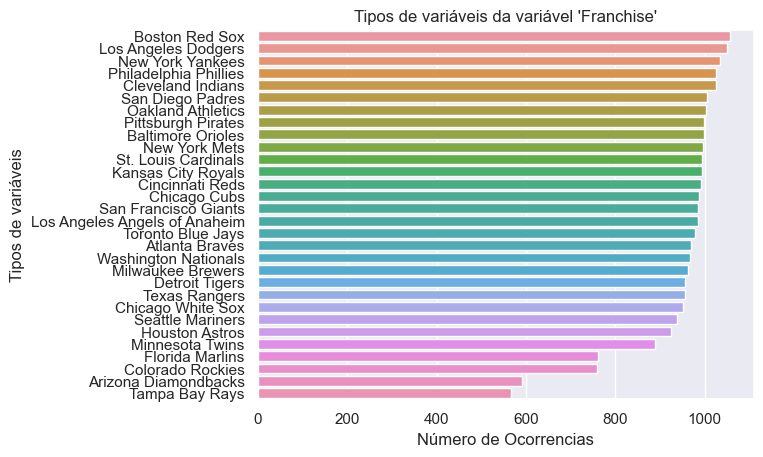

In [91]:
bats_count = df['bats'].value_counts()
throws_count = df['throws'].value_counts()
league_count = df['League'].value_counts()
teamID_count = df['teamID'].value_counts()
team_count = df['Team'].value_counts()
fran_count = df['Franchise'].value_counts()

sns.set(style="darkgrid")
sns.barplot(x=bats_count.index, y=bats_count.values)
plt.title("Tipos de variáveis da variável 'bats'")
plt.ylabel("Número de Ocorrencias", fontsize=12)
plt.xlabel("Tipos de variáveis", fontsize=12)
plt.show()

sns.set(style="darkgrid")
sns.barplot(x=throws_count.index, y=throws_count.values)
plt.title("Tipos de variáveis da variável 'throws'")
plt.ylabel("Número de Ocorrencias", fontsize=12)
plt.xlabel("Tipos de variáveis", fontsize=12)
plt.show()

sns.set(style="darkgrid")
sns.barplot(x=league_count.index, y=league_count.values)
plt.title("Tipos de variáveis da variável 'League'")
plt.ylabel("Número de Ocorrencias", fontsize=12)
plt.xlabel("Tipos de variáveis", fontsize=12)
plt.show()

sns.set(style="darkgrid")
sns.barplot(x=teamID_count.values, y=teamID_count.index)
plt.title("Tipos de variáveis da variável 'teamID'")
plt.xlabel("Número de Ocorrencias", fontsize=12)
plt.ylabel("Tipos de variáveis", fontsize=12)
plt.show()

sns.set(style="darkgrid")
sns.barplot(x=team_count.values, y=team_count.index)
plt.title("Tipos de variáveis da variável 'Team'")
plt.xlabel("Número de Ocorrencias", fontsize=12)
plt.ylabel("Tipos de variáveis", fontsize=12)
plt.show()

sns.set(style="darkgrid")
sns.barplot(x=fran_count.values, y=fran_count.index)
plt.title("Tipos de variáveis da variável 'Franchise'")
plt.xlabel("Número de Ocorrencias", fontsize=12)
plt.ylabel("Tipos de variáveis", fontsize=12)
plt.show()

##### Substituição dos dados

###### Glossário
| Nome da Variável | Formato antigo | Formato alterado |
| -------- | -------- | -------- |
| bats | Destro (R), canhoto (L) ou usa as duas (B). (String) | Destro (2), canhoto (1) ou usa as duas (0) (Inteiro)|
| throws |  Destro (R) ou canhoto (L). (String) | Destro (1) ou canhoto (0). (Inteiro) |
| League | Liga Americana (AL) ou Nacional (NL). (String) | Liga Americana (0) ou Nacional (1) (Inteiro)|
| teamID| Nome abreviado da equipa da MLB a que pertence. (String) | Número identificador da equipa da MLB a que pertence (Inteiro)|
| Franchise | Nome da franquia que é dona da equipa a que pertence. (String) | Número identificador da franquia que é dona da equipa da MLB a que pertence (Inteiro) |

Chaves das Equipas e Franquias:


<div style="display: flex; gap: 20px;">
    <table>
         <tr>
    <th>teamID</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>ANA</td>
    <td>0</td>
  </tr>
  <tr>
    <td>ARI</td>
    <td>1</td>
  </tr>
  <tr>
    <td>ATL</td>
    <td>2</td>
  </tr>
  <tr>
    <td>BAL</td>
    <td>3</td>
  </tr>
  <tr>
    <td>BOS</td>
    <td>4</td>
  </tr>
  <tr>
    <td>CAL</td>
    <td>5</td>
  </tr>
  <tr>
    <td>CHA</td>
    <td>6</td>
  </tr>
  <tr>
    <td>CHN</td>
    <td>7</td>
  </tr>
  <tr>
    <td>CIN</td>
    <td>8</td>
  </tr>
  <tr>
    <td>CLE</td>
    <td>9</td>
  </tr>
  <tr>
    <td>COL</td>
    <td>10</td>
  </tr>
  <tr>
    <td>DET</td>
    <td>11</td>
  </tr>
  <tr>
    <td>FLO</td>
    <td>12</td>
  </tr>
  <tr>
    <td>HOU</td>
    <td>13</td>
  </tr>
  <tr>
    <td>KCA</td>
    <td>14</td>
  </tr>
  <tr>
    <td>LAA</td>
    <td>15</td>
  </tr>
  <tr>
    <td>LAN</td>
    <td>16</td>
  </tr>
  <tr>
    <td>MIA</td>
    <td>17</td>
  </tr>
  <tr>
    <td>MIL</td>
    <td>18</td>
  </tr>
  <tr>
    <td>MIN</td>
    <td>19</td>
  </tr>
  <tr>
    <td>ML4</td>
    <td>20</td>
  </tr>
  <tr>
    <td>MON</td>
    <td>21</td>
  </tr>
  <tr>
    <td>NYA</td>
    <td>22</td>
  </tr>
  <tr>
    <td>NYN</td>
    <td>23</td>
  </tr>
  <tr>
    <td>OAK</td>
    <td>24</td>
  </tr>
  <tr>
    <td>PHI</td>
    <td>25</td>
  </tr>
  <tr>
    <td>PIT</td>
    <td>26</td>
  </tr>
  <tr>
    <td>SDN</td>
    <td>27</td>
  </tr>
  <tr>
    <td>SEA</td>
    <td>28</td>
  </tr>
  <tr>
    <td>SFN</td>
    <td>29</td>
  </tr>
  <tr>
    <td>SLN</td>
    <td>30</td>
  </tr>
  <tr>
    <td>TBA</td>
    <td>31</td>
  </tr>
  <tr>
    <td>TEX</td>
    <td>32</td>
  </tr>
  <tr>
    <td>TOR</td>
    <td>33</td>
  </tr>
  <tr>
    <td>WAS</td>
    <td>34</td>
  </tr>
    </table>
    <table>
        <tr>
    <th>Franchise</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Arizona Diamondbacks</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Atlanta Braves</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Baltimore Orioles</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Boston Red Sox</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Chicago Cubs</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Chicago White Sox</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Cincinnati Reds</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Cleveland Indians</td>
    <td>7</td>
  </tr>
  <tr>
    <td>Colorado Rockies</td>
    <td>8</td>
  </tr>
  <tr>
    <td>Detroit Tigers</td>
    <td>9</td>
  </tr>
  <tr>
    <td>Florida Marlins</td>
    <td>10</td>
  </tr>
  <tr>
    <td>Houston Astros</td>
    <td>11</td>
  </tr>
  <tr>
    <td>Kansas City Royals</td>
    <td>12</td>
  </tr>
  <tr>
    <td>Los Angeles Angels of Anaheim</td>
    <td>13</td>
  </tr>
  <tr>
    <td>Los Angeles Dodgers</td>
    <td>14</td>
  </tr>
  <tr>
    <td>Milwaukee Brewers</td>
    <td>15</td>
  </tr>
  <tr>
    <td>Minnesota Twins</td>
    <td>16</td>
  </tr>
  <tr>
    <td>New York Mets</td>
    <td>17</td>
  </tr>
  <tr>
    <td>New York Yankees</td>
    <td>18</td>
  </tr>
  <tr>
    <td>Oakland Athletics</td>
    <td>19</td>
  </tr>
  <tr>
    <td>Philadelphia Phillies</td>
    <td>20</td>
  </tr>
  <tr>
    <td>Pittsburgh Pirates</td>
    <td>21</td>
  </tr>
  <tr>
    <td>San Diego Padres</td>
    <td>22</td>
  </tr>
  <tr>
    <td>San Francisco Giants</td>
    <td>23</td>
  </tr>
  <tr>
    <td>Seattle Mariners</td>
    <td>24</td>
  </tr>
  <tr>
    <td>St. Louis Cardinals</td>
    <td>25</td>
  </tr>
  <tr>
    <td>Tampa Bay Rays</td>
    <td>26</td>
  </tr>
  <tr>
    <td>Texas Rangers</td>
    <td>27</td>
  </tr>
  <tr>
    <td>Toronto Blue Jays</td>
    <td>28</td>
  </tr>
  <tr>
    <td>Washington Nationals</td>
    <td>29</td>
  </tr>
    </table>
</div>


###### Tratamento

In [92]:
df1 = df.copy()

bats_count = df['bats'].value_counts()
throws_count = df['throws'].value_counts()
league_count = df['League'].value_counts()
teamID_count = df['teamID'].value_counts()
fran_count = df['Franchise'].value_counts()


b_lables = df['bats'].astype('category').cat.categories.tolist()
thr_lables = df['throws'].astype('category').cat.categories.tolist()
l_lables = df['League'].astype('category').cat.categories.tolist()
ti_lables = df['teamID'].astype('category').cat.categories.tolist()
f_lables = df['Franchise'].astype('category').cat.categories.tolist()

replace = {'bats':{k: v for k,v in zip(b_lables,list(range(0,len(b_lables)+1)))},
           'throws':{k: v for k,v in zip(thr_lables,list(range(0,len(thr_lables)+1)))},
           'League':{k: v for k,v in zip(l_lables,list(range(0,len(l_lables)+1)))},
           'teamID':{k: v for k,v in zip(ti_lables,list(range(0,len(ti_lables)+1)))},
           'Franchise':{k: v for k,v in zip(f_lables,list(range(0,len(f_lables)+1)))}}

#print(replace)

df1.replace(replace,inplace=True)

df1.head()

,index,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,0,aardsda01,David Aardsma,215,75,2,1,2004,1,29,...,0,0,0,0,300000,0,0,0,0,0
1,1,aardsda01,David Aardsma,215,75,2,1,2007,0,6,...,0,0,0,0,387500,0,0,0,0,0
2,2,aardsda01,David Aardsma,215,75,2,1,2008,0,4,...,0,0,0,1,403250,0,0,0,0,1
3,3,aardsda01,David Aardsma,215,75,2,1,2009,0,28,...,0,0,0,0,419000,0,0,0,0,0
4,4,aardsda01,David Aardsma,215,75,2,1,2012,0,22,...,0,0,0,0,500000,0,0,0,0,0


In [93]:
df_int2 = df1.select_dtypes(include=['int'])
df_int2.corr()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        28293 non-null  int64 
 1   playerID     28293 non-null  object
 2   Player Name  28293 non-null  object
 3   weight       28293 non-null  int64 
 4   height       28293 non-null  int64 
 5   bats         28293 non-null  int64 
 6   throws       28293 non-null  int64 
 7   Season       28293 non-null  int64 
 8   League       28293 non-null  int64 
 9   teamID       28293 non-null  int64 
 10  Team         28293 non-null  object
 11  Franchise    28293 non-null  int64 
 12  G            28293 non-null  int64 
 13  AB           28293 non-null  int64 
 14  R            28293 non-null  int64 
 15  H            28293 non-null  int64 
 16  2B           28293 non-null  int64 
 17  3B           28293 non-null  int64 
 18  HR           28293 non-null  int64 
 19  RBI          28293 non-nu

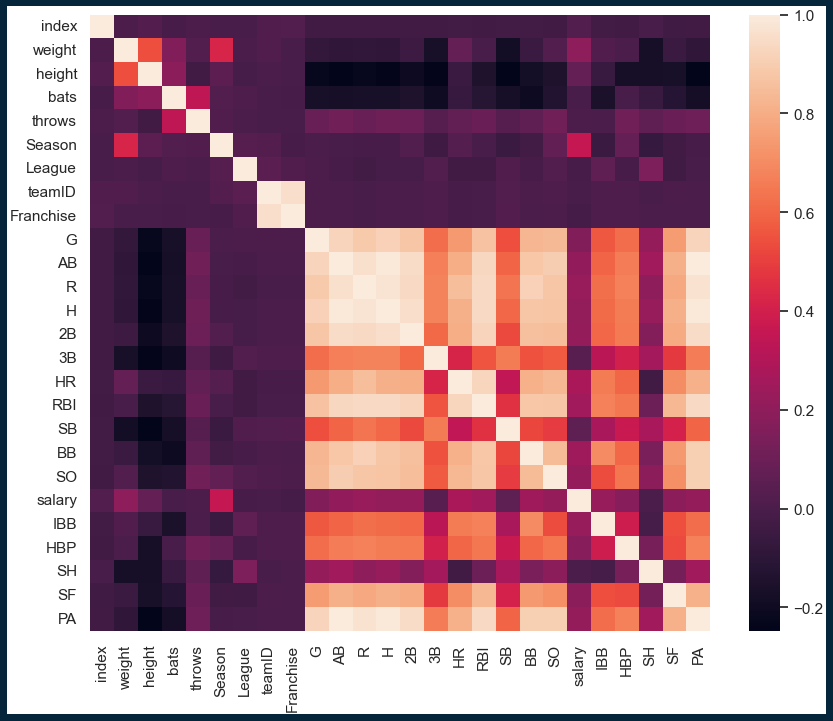

In [95]:
plt.figure(figsize=(10,8),linewidth=10,edgecolor="#04253a" )
sns.heatmap(df_int2.corr())
plt.show()

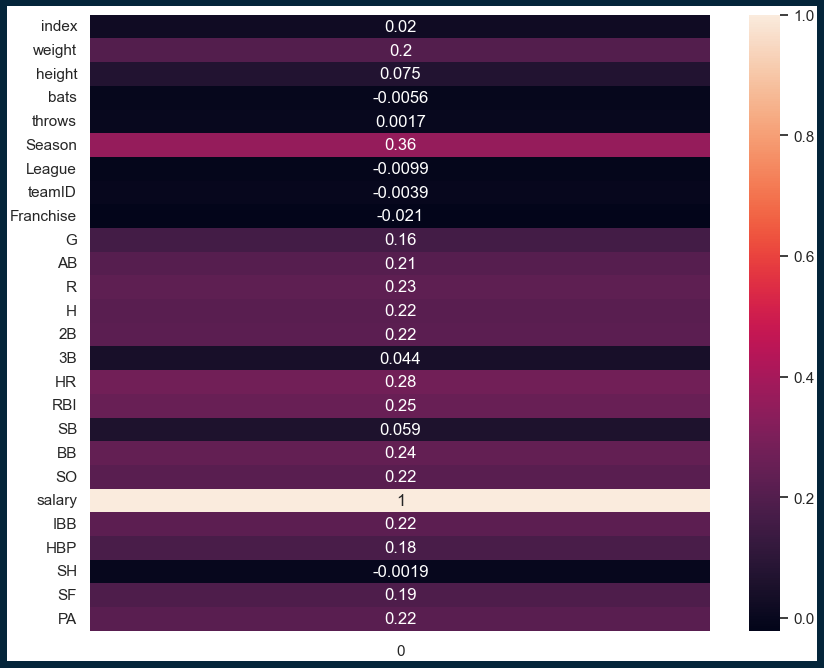

In [107]:
plt.figure(figsize=(10,8),linewidth=10,edgecolor="#04253a" )
sns.heatmap(df_int2.corrwith(df_int2['salary']).to_frame(), annot=True)
plt.show()

In [3]:
sns.histplot(df1['salary'])

NameError: name 'sns' is not defined

##### ORIGINAL

<Axes: >

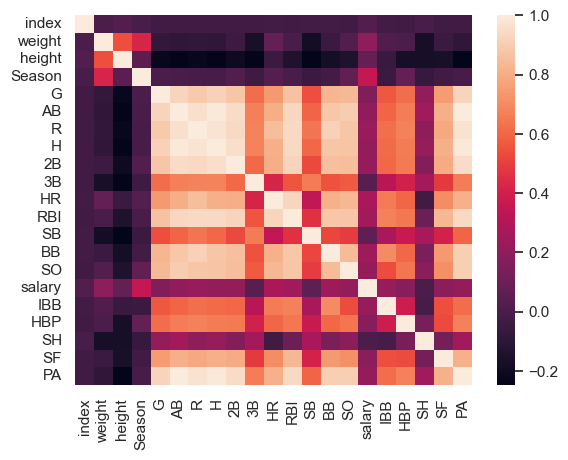

In [94]:
sns.heatmap(df_int.corr())

<Axes: >

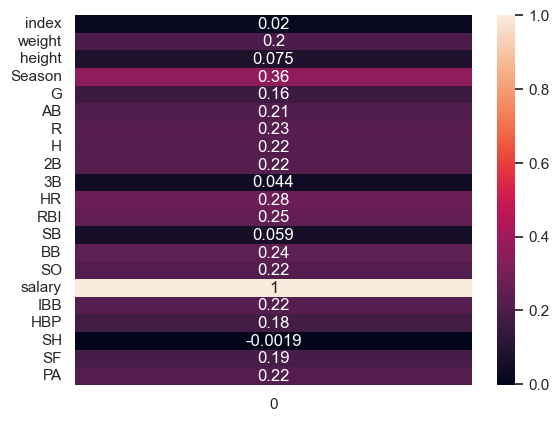

In [96]:
sns.heatmap(df_int.corrwith(df_int['salary']).to_frame(), annot=True)

<Axes: xlabel='salary', ylabel='Count'>

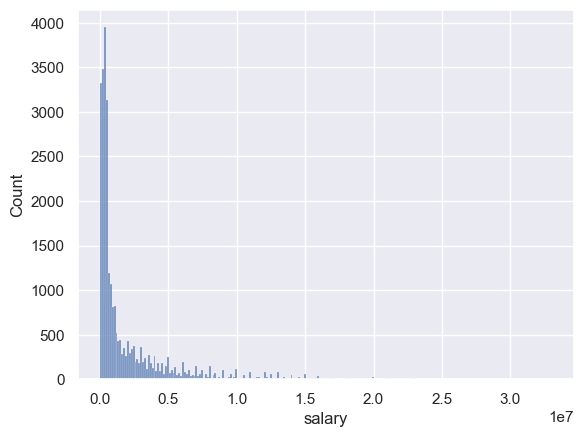

In [97]:
sns.histplot(df['salary'])

In [ ]:
#sns.pairplot(df)

In [109]:
# verficiar duplicados
df.duplicated().sum()

0

In [100]:
df['salary'].value_counts(normalize=True) # com normalize é para ter percentagens

salary
109000     0.023822
200000     0.016506
500000     0.015446
1000000    0.014208
300000     0.012971
             ...   
2772500    0.000035
846667     0.000035
5792956    0.000035
4809159    0.000035
504100     0.000035
Name: proportion, Length: 3352, dtype: float64

In [101]:
df['salary'].describe()


count    2.829300e+04
mean     2.112965e+06
std      3.440239e+06
min      1.090000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.425000e+06
max      3.300000e+07
Name: salary, dtype: float64

### Tratamento de dados e Modelos

In [102]:
df['playerID']



0        aardsda01
1        aardsda01
2        aardsda01
3        aardsda01
4        aardsda01
           ...    
28288    zupcibo01
28289    zupcibo01
28290    zupcibo01
28291    zuvelpa01
28292     zychto01
Name: playerID, Length: 28293, dtype: object

##### Regressão Linear (sem Label Encoding)

In [103]:
# Nesta parte depois mudar vou fazer tratamento e iniciacao de um modelo

x = df_int.drop('salary',axis=1)

y = df['salary']

#print(y.head())

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# regressao linear
ln = LinearRegression()

ln.fit(x_train,y_train)

#coeff_df = pd.DataFrame(ln.coef_,x.columns,columns=['Coefficient'])
#print(coeff_df)

print(ln.intercept_)

predictions = ln.predict(x_test)

#plt.scatter(y_test,predictions)
print()

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


print("\n---------CROSS-VALIDATION-----------\n")

# Define custom scorers

scoring = {
    'MAE': make_scorer(metrics.mean_absolute_error),
    'MSE': make_scorer(metrics.mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
}

# Perform cross-validation
scores = cross_validate(ln, x, y, cv=5, scoring=scoring, return_train_score=False)

# Print scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print('MAE:', scores['test_MAE'][i])
    print('MSE:', scores['test_MSE'][i])
    print('RMSE:', scores['test_RMSE'][i])
    print()

# Print average scores
print('Average MAE:', scores['test_MAE'].mean())
print('Average MSE:', scores['test_MSE'].mean())
print('Average RMSE:', scores['test_RMSE'].mean())


-306542481.71697485

MAE: 1921803.3280790015
MSE: 8638694970687.966
RMSE: 2939165.69296254

---------CROSS-VALIDATION-----------

Fold 1:
MAE: 1864827.8311683417
MSE: 7720033829250.21
RMSE: 2778494.885590076

Fold 2:
MAE: 1907884.4764286007
MSE: 8617466469511.546
RMSE: 2935552.157518504

Fold 3:
MAE: 1947908.211462852
MSE: 9251545474808.047
RMSE: 3041635.329030758

Fold 4:
MAE: 2033874.224835974
MSE: 10060062549281.451
RMSE: 3171760.165788304

Fold 5:
MAE: 2011344.0672007008
MSE: 9603017211061.697
RMSE: 3098873.5390560385

Average MAE: 1953167.7622192937
Average MSE: 9050425106782.59
Average RMSE: 3005263.2153967363


##### Regressão Linear (com Label Encoding)

In [104]:

# SEM CV !!!!

# Regressao linear com label encoding !!!!!!!!!11
le = LabelEncoder()


# Fit and transform the 'column_name' column
for col in ['bats','throws','teamID','League']:
    df[col] = le.fit_transform(df[col])


x = df.drop(['salary','playerID','Player Name','Franchise','Team'],axis=1)

#print(x.head)

y = df['salary']

#print(y.head())

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# regressao linear
ln = LinearRegression()

ln.fit(x_train,y_train)

#coeff_df = pd.DataFrame(ln.coef_,x.columns,columns=['Coefficient'])
#print(coeff_df)

print(ln.intercept_)

predictions = ln.predict(x_test)

#plt.scatter(y_test,predictions)
print()

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


print("\n---------CROSS-VALIDATION-----------\n")

# Define custom scorers

scoring = {
    'MAE': make_scorer(metrics.mean_absolute_error),
    'MSE': make_scorer(metrics.mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
}

# Perform cross-validation
scores = cross_validate(ln, x, y, cv=5, scoring=scoring, return_train_score=False)

# Print scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print('MAE:', scores['test_MAE'][i])
    print('MSE:', scores['test_MSE'][i])
    print('RMSE:', scores['test_RMSE'][i])
    print()

# Print average scores
print('Average MAE:', scores['test_MAE'].mean())
print('Average MSE:', scores['test_MSE'].mean())
print('Average RMSE:', scores['test_RMSE'].mean())


-307016505.92236435

MAE: 1920972.2204467554
MSE: 8636678876996.754
RMSE: 2938822.702545486

---------CROSS-VALIDATION-----------

Fold 1:
MAE: 1860253.6870158152
MSE: 7723041981006.929
RMSE: 2779036.160435292

Fold 2:
MAE: 1907406.7677652615
MSE: 8609721066805.985
RMSE: 2934232.6197501766

Fold 3:
MAE: 1948060.672266722
MSE: 9260010071799.072
RMSE: 3043026.465839407

Fold 4:
MAE: 2042638.9452020116
MSE: 10094512920672.732
RMSE: 3177186.3213656093

Fold 5:
MAE: 2007084.7577894772
MSE: 9620260442886.404
RMSE: 3101654.4686483704

Average MAE: 1953088.9660078574
Average MSE: 9061509296634.225
Average RMSE: 3007027.207207771


##### Support Vector Regression (SVR)
Com Cross-Validation

 

In [105]:


# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly' ], # , 'rbf', 'sigmoid'
    'C': [0.1, 1], # ,10,100
    'gamma': ['scale'], #'auto'
    'epsilon': [0.1, 0.3] # ,0.2,0.4,0.5
}

# Create a base model
svr = SVR()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
best_predictions = best_model.predict(x_test)

print(best_model)
best_params = best_model.get_params()
print('Gamma:', best_params['gamma'])
print('Epsilon:', best_params['epsilon'])

# Print metrics
print('MAE:', metrics.mean_absolute_error(y_test, best_predictions))
print('MSE:', metrics.mean_squared_error(y_test, best_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, best_predictions)))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


KeyboardInterrupt: 

#### Decision Tree Regression

In [ ]:
dtr = DecisionTreeRegressor(random_state=0)

# Train the model
dtr.fit(x_train, y_train)

# Make predictions
predictions = dtr.predict(x_test)

# Print metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#### Random Forest Regression
Sem *cross-validation* e sem *label enconding*

In [ ]:
# ADICIONAR DEPOIS HYPERPARAMETER TUNING !!!
# gridSeach

# Create a Random Forest Regression model
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
rfr.fit(x_train, y_train)

# Make predictions
predictions = rfr.predict(x_test)

# Print metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#### Neural Networks

In [ ]:
#!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.metrics import mean_absolute_error, mean_squared_error

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=10)

# Make predictions
predictions = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = tf.sqrt(mse)

# Print metrics
print('MAE:', mae.numpy())
print('MSE:', mse.numpy())
print('RMSE:', rmse.numpy())

#### Lasso Regression (NÃO DEMOS)
Sem Cross Validation

In [ ]:
# Define the model
model = Lasso(alpha=0.1)

# Train the model
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Calculate metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

### Classificação

Para podermos aplicar o máximo de algoritmos aprendidos durante as aulas, decidimos utilizar bins para colocar a váriável salario em 5 categorias e usar os restantes dos atributos do dataset para prever.

algoritmo a

## Conclusões

RandomForest foi o melhor até agora !

## NOTAS :  !!!!!!!!!!!!!!!!!!!11111

1. USAR OUTRAS TECNICAS E EXPLORAR E TRATAR ISTO MELHOR

2. UTILIZAR OUTRO DATASET E FAZER OUTRA CENA IGUAL COM OUTRO DATASET ! 


POR MAIS GRAFICOS PL3 !!!!!!!!!!!!!!!! => Ver slides

NOS DAS REGRESSÕES TENTAR FAZER COM CROSS OUT VALIDATION  (cv)!!!!!

Tentar fazer todos os algoritmos com cv e label encondign e eliminar colunas e cenas assim!!
Para tentar o melhor modelo